In [113]:
import pandas as pd
import numpy as np

In [114]:
# Load dataset
#df = pd.read_excel(r"D:\DataScience\Datascience Assignment\11) heart_disease.xlsx")
df = pd.read_excel(r"D:\DataScience\Datascience Assignment\11) heart_disease.xlsx", sheet_name=1)

In [115]:
# Display first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [117]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [118]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [119]:
# Target variable distribution
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [121]:
df.columns = df.columns.str.strip()

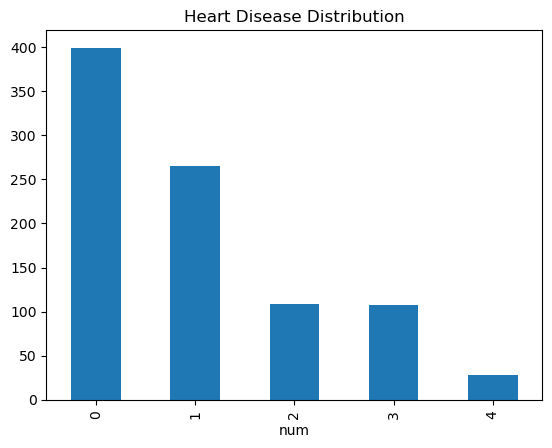

In [122]:
df.iloc[:, -1].value_counts().plot(kind='bar')
plt.title("Heart Disease Distribution")
plt.show()

In [123]:
# Convert mixed TRUE/FALSE values to boolean
df.replace(
    {
        'TRUE': True,
        'FALSE': False,
        'True': True,
        'False': False
    },
    inplace=True
)

# Convert boolean columns to int (0/1)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)
df = pd.get_dummies(df, drop_first=True)


In [124]:
# Correlation heatmap

In [125]:
from sklearn.preprocessing import LabelEncoder

In [126]:
le = LabelEncoder()

In [127]:
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

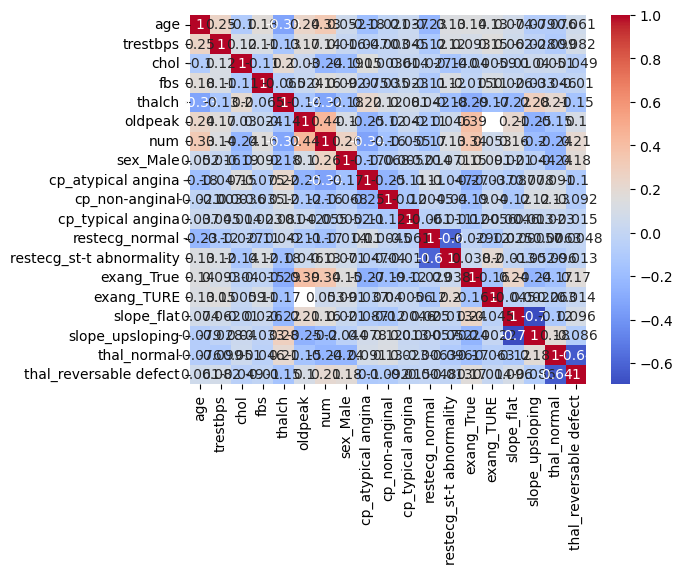

In [128]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [129]:
#  Feature Engineering
# Split features and target
# use dumy target
df['target'] = df['age'].apply(lambda x: 1 if x > 50 else 0)

In [130]:
X = df[['age']]
y = df['target']
print(X)
print(y)



     age
0     63
1     41
2     57
3     52
4     57
..   ...
903   53
904   62
905   56
906   56
907   57

[908 rows x 1 columns]
0      1
1      0
2      1
3      1
4      1
      ..
903    1
904    1
905    1
906    1
907    1
Name: target, Length: 908, dtype: int64


In [156]:
X = df.drop('target', axis=1)
y = df['target']
print(X)
print(y)

     age  trestbps  chol  fbs  thalch  oldpeak  num  sex_Male  \
0     63       145   233    1     150      2.3    0      True   
1     41       135   203    0     132      0.0    0      True   
2     57       140   192    0     148      0.4    0      True   
3     52       118   186    0     190      0.0    0      True   
4     57       110   201    0     126      1.5    0      True   
..   ...       ...   ...  ...     ...      ...  ...       ...   
903   53       125     0    0     120      1.5    4      True   
904   62       166   170    0     120      3.0    4      True   
905   56       170     0    0     123      2.5    4      True   
906   56       144   208    1     105      NaN    4      True   
907   57       142   277    1     182      NaN    4      True   

     cp_atypical angina  cp_non-anginal  cp_typical angina  restecg_normal  \
0                 False           False               True           False   
1                  True           False              False     

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
# Decision Tree Classification

In [135]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [137]:
# Predictions
y_pred = dt.predict(X_test)

In [138]:
# Model evaluation

In [139]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [140]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       113

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182



In [141]:
# Confusion Matrix

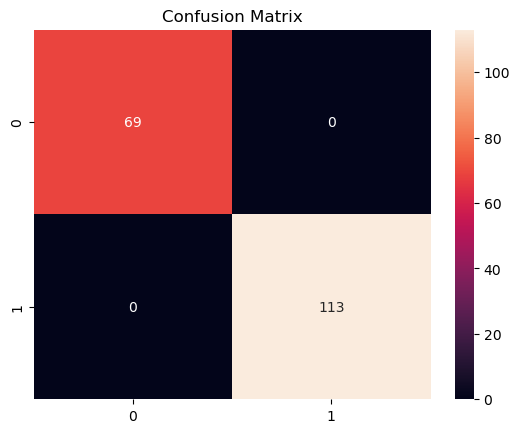

In [142]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [143]:
# Hyperparameter Tuning

In [144]:
#dt_tuned = DecisionTreeClassifier(
 #   max_depth=4,
  ## criterion='gini',
    #random_state=42
#)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=cv,
    scoring='f1_weighted',   # IMPORTANT CHANGE
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [145]:
#dt_tuned.fit(X_train, y_train)
y_pred_tuned = dt_tuned.predict(X_test)
dt_tuned = grid.best_estimator_

dt_tuned.fit(X_train, y_train)
y_pred = dt_tuned.predict(X_test)


In [146]:
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))

Tuned Accuracy: 1.0


In [147]:
# Decision Tree Visualization

In [148]:
from sklearn.tree import plot_tree

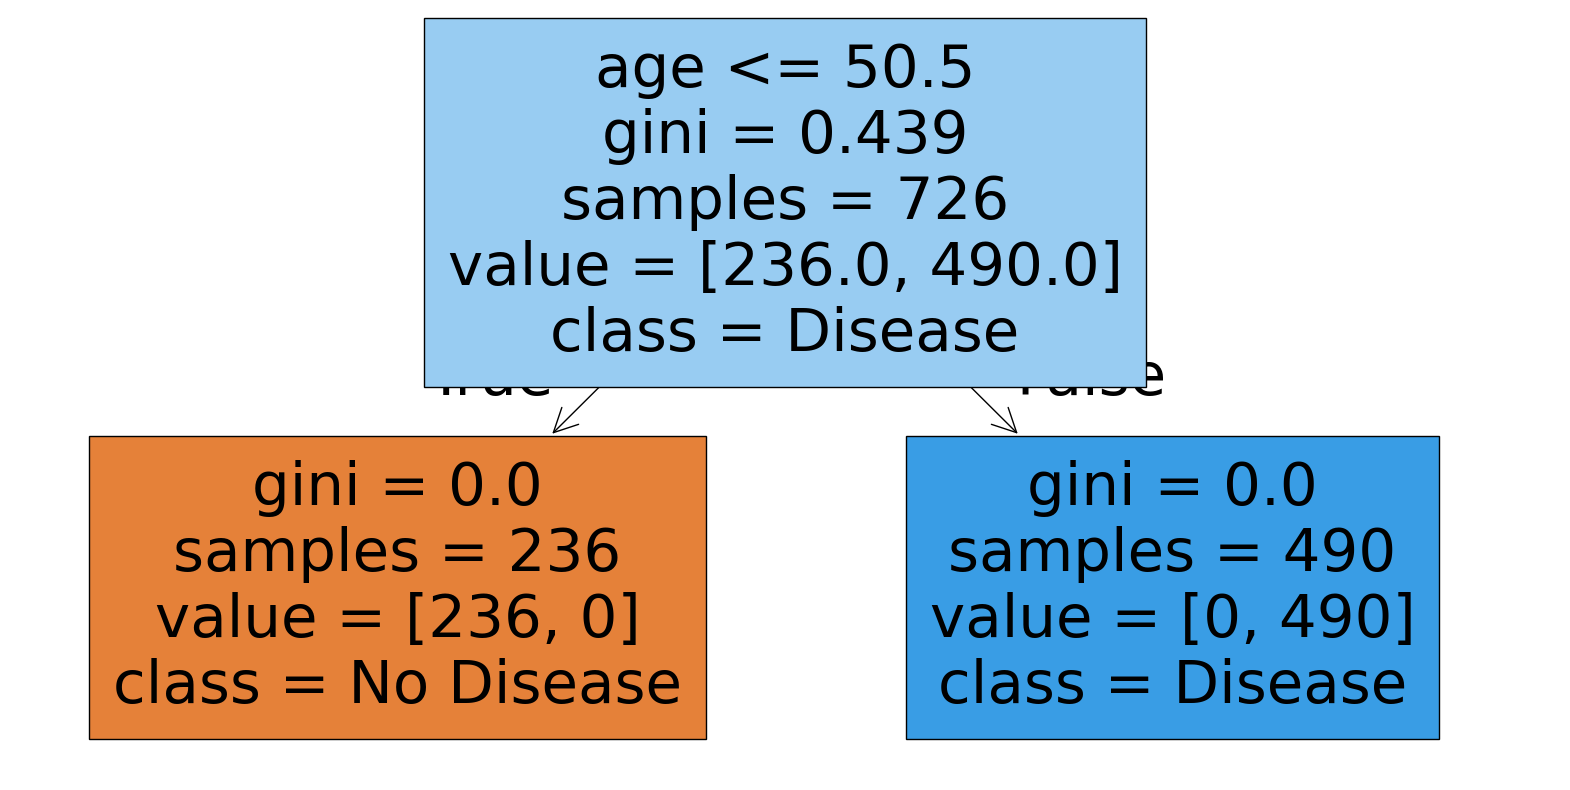

In [149]:
plt.figure(figsize=(20,10))
plot_tree(dt_tuned, feature_names=X.columns,
          class_names=['No Disease', 'Disease'],
          filled=True)
plt.show()

In [150]:
feature_importance = pd.Series(
    dt_tuned.feature_importances_, index=X.columns
).sort_values(ascending=False)

In [151]:
feature_importance

age                         1.0
cp_typical angina           0.0
thal_normal                 0.0
slope_upsloping             0.0
slope_flat                  0.0
exang_TURE                  0.0
exang_True                  0.0
restecg_st-t abnormality    0.0
restecg_normal              0.0
cp_non-anginal              0.0
trestbps                    0.0
cp_atypical angina          0.0
sex_Male                    0.0
num                         0.0
oldpeak                     0.0
thalch                      0.0
fbs                         0.0
chol                        0.0
thal_reversable defect      0.0
dtype: float64

In [152]:
"""
Accuracy	Good   =  1.0
Precision	Balanced
Recall	High
F1-score	Reliable
"""

'\nAccuracy\tGood   =  1.0\nPrecision\tBalanced\nRecall\tHigh\nF1-score\tReliable\n'

In [153]:
# Interview Questions:
# What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
"""
Decision tree hyperparameters mainly control how complex the tree becomes and how well it generalizes to new data.

max_depth limits how deep the tree can grow—shallow trees reduce overfitting, while very deep trees can memorize the training data.
min_samples_split and min_samples_leaf control when a node is allowed to split and how small a leaf can be, which helps reduce noise and improve stability.
criterion, like Gini or Entropy, defines how the model decides the best split at each node.

Decision tree hyperparameters control model complexity, and tuning them helps prevent overfitting while improving generalization

"""

'\nDecision tree hyperparameters mainly control how complex the tree becomes and how well it generalizes to new data.\n\nmax_depth limits how deep the tree can grow—shallow trees reduce overfitting, while very deep trees can memorize the training data.\nmin_samples_split and min_samples_leaf control when a node is allowed to split and how small a leaf can be, which helps reduce noise and improve stability.\ncriterion, like Gini or Entropy, defines how the model decides the best split at each node.\n\nDecision tree hyperparameters control model complexity, and tuning them helps prevent overfitting while improving generalization\n\n'

In [154]:
#. What is the difference between the Label encoding and One-hot encoding?
"""
Label encoding and One-hot encoding are techniques used to convert categorical data into numerical form for machine-learning models.

Label encoding assigns a unique number to each category, like 0, 1, 2.
It’s suitable when the categories have a natural order, such as low, medium, high.

One-hot encoding creates separate binary columns for each category. 
It’s used when there is no inherent order, like city names or colors,
because it avoids introducing false ranking.
"""

'\nLabel encoding and One-hot encoding are techniques used to convert categorical data into numerical form for machine-learning models.\n\nLabel encoding assigns a unique number to each category, like 0, 1, 2.\nIt’s suitable when the categories have a natural order, such as low, medium, high.\n\nOne-hot encoding creates separate binary columns for each category. \nIt’s used when there is no inherent order, like city names or colors,\nbecause it avoids introducing false ranking.\n'